# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import numpy
#from datetime import date
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
my_btc

1.2

In [5]:
my_eth

5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price

response_bitcoin_url = requests.get(btc_url).json()
print(json.dumps(response_bitcoin_url, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18660337,
            "total_supply": 18660337,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 57615.0,
                    "volume_24h": 58752302614,
                    "market_cap": 1073729980717,
                    "percentage_change_1h": 0.164379449245255,
                    "percentage_change_24h": -3.18576935784288,
                    "percentage_change_7d": -6.03458790075499,
                    "percent_change_1h": 0.164379449245255,
                    "percent_change_24h": -3.18576935784288,
                    "percent_change_7d": -6.03458790075499
                },
                "CAD": {
                    "price": 72087.888,
                    "volume_24h": 73510881030.6368,
                   

In [8]:
bitcoin_metadata_timestamp=response_bitcoin_url["metadata"]["timestamp"]
bitcoin_metadata_timestamp

1616352518

In [9]:
bitcoin_CAD_price=response_bitcoin_url["data"]["1"]["quotes"]["CAD"]["price"]
bitcoin_CAD_price

72087.888

In [10]:
# Fetch current ETH price
]
re = requests.get(eth_url).json()
##print(json.dumps(re, indent=4))
eth_cad_price=re["data"]["1027"]["quotes"]["CAD"]["price"]
eth_cad_price

2252.260096

In [11]:
# Compute current value of my crpto

 
my_total_btc = my_btc * bitcoin_CAD_price
my_total_btc

86505.46560000001

In [12]:
my_total_eth = my_eth * eth_cad_price
my_total_eth

11936.978508799999

In [13]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_total_btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_total_eth:0.2f}")


The current value of your 1.2 BTC is $86505.47
The current value of your 5.3 ETH is $11936.98


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
total_crypto = my_total_btc + my_total_eth
total_crypto

98442.4441088

In [15]:
# Current amount of shares

my_agg = 200 
my_spy = 50 

In [16]:
# Set Alpaca API key and secret

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [17]:
# Format current date as ISO format

today = pd.Timestamp("2020-10-27", tz="America/New_York").isoformat()
today

'2020-10-27T00:00:00-04:00'

In [18]:
tomorrow = pd.Timestamp("2020-07-15", tz="America/New_York").isoformat()
tomorrow

'2020-07-15T00:00:00-04:00'

In [19]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [20]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [21]:
# Get current closing prices for SPY and AGG

fp_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [22]:
# Preview DataFrame

fp_portfolio

AGG                                        SPY  \
                            open    high       low   close   volume    open   
2020-10-27 00:00:00-04:00  117.8  117.91  117.7275  117.87  5016038  339.76   

                                                             
                             high     low   close    volume  
2020-10-27 00:00:00-04:00  340.12  337.99  338.25  50634843

In [23]:
# Pick AGG and SPY close prices


agg_close_price = fp_portfolio["AGG"].iloc[0]["close"]
agg_close_price

117.87

In [24]:
spy_close_price= fp_portfolio["SPY"].iloc[0]["close"]
spy_close_price

338.25

In [25]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:.2f}")
print(f"Current SPY closing price: ${spy_close_price:.2f}")

Current AGG closing price: $117.87
Current SPY closing price: $338.25


In [26]:
# Compute the current value of shares

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

#my_spy_value

#my_agg_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16912.50
The current value of your 200 AGG shares is $23574.00


### Savings Health Analysis

In [27]:
total_share_amt = (my_spy_value) + (my_agg_value)
total_share_amt

40486.5

In [28]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame


savings_data = { "amount": [total_crypto,total_share_amt]}
rows = ["crypto","shares"]

df_savings=pd.DataFrame(savings_data, index=rows)


# Display savings DataFrame
display(df_savings)

,amount
crypto,98442.444109
shares,40486.500000


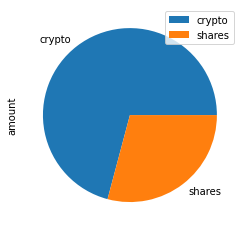

In [29]:
# Plot savings pie chart

df_savings.plot.pie (y = 'amount', subplots=False)

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [31]:
# Calculate total amount of savings

total_savings_amt =  total_crypto + total_share_amt

total_savings_amt

# Validate saving health


if total_savings_amt > emergency_fund:
    print("Congratulations, Vishal! you have enough amount to cover for emergencies")
elif total_savings_amt == emergency_fund:
            print("Congratulations, Vishal! the person on reaching this financial goal.")
else:
                    print("Congratulations, Vishal! you are only short by {emergency_fund-total_savings_amt}")
            

Congratulations, Vishal! you have enough amount to cover for emergencies


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [32]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-28', tz='America/New_York').isoformat()

In [33]:
# Get 5 years' worth of historical data for SPY and AGG

rp_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
rp_portfolio.head()

AGG                                         SPY  \
                             open    high      low    close    volume    open   
2020-06-09 00:00:00-04:00  117.31  117.33  117.190  117.190  10803958  320.30   
2020-06-10 00:00:00-04:00  117.25  117.68  117.185  117.665   9007660  321.42   
2020-06-11 00:00:00-04:00  117.73  117.80  117.435  117.460  11813838  311.46   
2020-06-12 00:00:00-04:00  117.60  117.70  117.570  117.640   1790030  308.24   
2020-06-15 00:00:00-04:00  117.72  117.98  117.610  117.940   8120154  298.02   

                                                                  
                               high       low   close     volume  
2020-06-09 00:00:00-04:00  323.2849  319.3600  320.81  135203810  
2020-06-10 00:00:00-04:00  322.3900  318.2209  319.01  167752089  
2020-06-11 00:00:00-04:00  312.1500  300.0100  300.62  363931654  
2020-06-12 00:00:00-04:00  309.0800  298.6000  304.28  168502612  
2020-06-15 00:00:00-04:00  308.2800  296.7400  307.03  246933334

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


?MCSimulation
MC_30year = MCSimulation(
    portfolio_data = rp_portfolio,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [35]:
# Printing the simulation input data

MC_30year.portfolio_data.head()

AGG                                      \
                             open    high      low    close    volume   
2020-06-09 00:00:00-04:00  117.31  117.33  117.190  117.190  10803958   
2020-06-10 00:00:00-04:00  117.25  117.68  117.185  117.665   9007660   
2020-06-11 00:00:00-04:00  117.73  117.80  117.435  117.460  11813838   
2020-06-12 00:00:00-04:00  117.60  117.70  117.570  117.640   1790030   
2020-06-15 00:00:00-04:00  117.72  117.98  117.610  117.940   8120154   

                                           SPY                              \
                          daily_return    open      high       low   close   
2020-06-09 00:00:00-04:00          NaN  320.30  323.2849  319.3600  320.81   
2020-06-10 00:00:00-04:00     0.004053  321.42  322.3900  318.2209  319.01   
2020-06-11 00:00:00-04:00    -0.001742  311.46  312.1500  300.0100  300.62   
2020-06-12 00:00:00-04:00     0.001532  308.24  309.0800  298.6000  304.28   
2020-06-15 00:00:00-04:00     0.002550  298.02  308.2800  296.7400  307.03   

                                                   
                              volume daily_return  
2020-06-09 00:00:00-04:00  135203810          NaN  
2020-06-10 00:00:00-04:00  167752089    -0.005611  
2020-06-11 00:00:00-04:00  363931654    -0.057647  
2020-06-12 00:00:00-04:00  168502612     0.012175  
2020-06-15 00:00:00-04:00  246933334     0.009038

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002343,0.996005,0.996881,1.001037,0.999793,1.004756,1.001819,0.997461,0.998348,1.002853,...,1.003706,1.001617,1.000745,1.003163,0.996747,1.003371,1.008048,1.005601,0.997394,1.007126
2,0.999653,0.994625,0.999910,1.001339,0.990970,0.998937,0.994528,0.998635,0.993569,1.009308,...,0.999732,1.009190,1.016140,1.008376,0.992723,1.002387,1.012886,1.005355,0.994304,1.017495
3,0.996377,0.993972,0.997185,0.992692,0.999514,0.999064,0.989952,1.001083,0.992536,1.017008,...,1.003854,1.006706,1.025220,1.003972,0.986039,1.010481,1.011162,0.999659,0.993039,1.016855
4,0.991030,0.994339,0.995518,0.992126,1.002918,0.998766,0.993131,1.003621,0.988612,1.017883,...,1.005595,1.019988,1.027221,1.011697,0.999126,1.015687,1.012007,1.001137,0.986414,1.017654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.108565,2.824886,3.848768,0.723423,3.411292,2.611805,2.023199,2.206565,2.407379,2.039188,...,3.055673,4.458983,1.918580,3.161281,4.782330,1.199605,5.066755,1.403927,1.987331,3.523697
7557,5.115058,2.794553,3.839232,0.722980,3.412289,2.624113,2.019087,2.198831,2.391847,2.046241,...,3.034474,4.524337,1.895661,3.171184,4.814243,1.191958,5.083270,1.405573,1.975389,3.487869
7558,5.109805,2.798376,3.836063,0.724022,3.430727,2.610909,2.015197,2.206832,2.374773,2.057895,...,3.012634,4.544556,1.910262,3.143313,4.829213,1.202527,5.090077,1.396620,1.984643,3.474606
7559,5.124954,2.793725,3.842240,0.721785,3.458904,2.616936,2.022086,2.199788,2.367125,2.054942,...,3.002589,4.590648,1.911722,3.151265,4.820292,1.199293,5.077500,1.397304,1.984092,3.439480


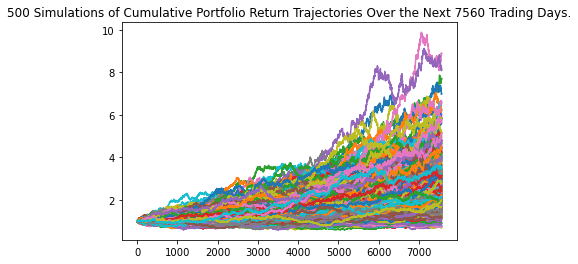

In [37]:
# Plot simulation outcomes

line_plot = MC_30year.plot_simulation()

line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

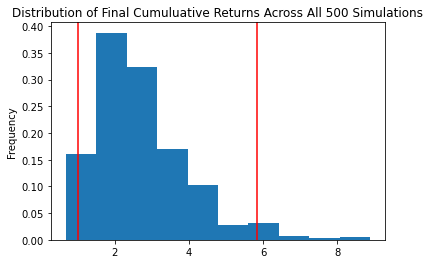

In [38]:
# Plot probability distribution and confidence intervals


dist_plot = MC_30year.plot_distribution()

dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')






### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              2.697268
std               1.230444
min               0.686575
25%               1.826810
50%               2.464863
75%               3.251860
max               8.885180
95% CI Lower      1.021454
95% CI Upper      5.830310
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000


ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20429.09 and $116606.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [50]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000


ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30643.63 and $174909.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = rp_portfolio,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [52]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.portfolio_data.head()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

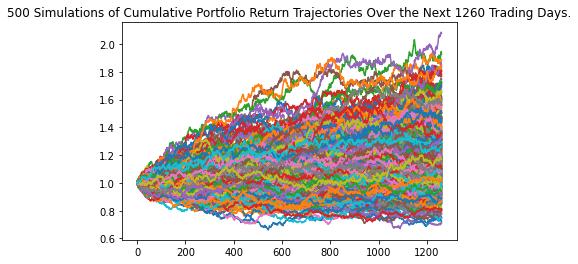

In [54]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

line_plot.get_figure().savefig("MC_5year_sim_plot.png", bbox_inches="tight")

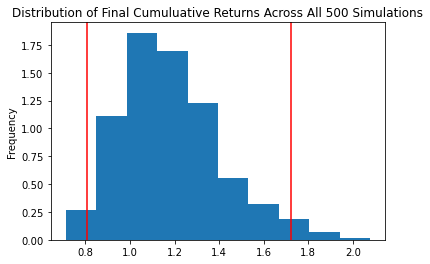

In [55]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()
dist_plot.get_figure().savefig('MC_5year_dist_plot.png',bbox_inches='tight')

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_5year.summarize_cumulative_return()

# Print summary statistics

print(tbl)


count           500.000000
mean              1.182152
std               0.227372
min               0.711796
25%               1.025151
50%               1.150651
75%               1.312398
max               2.077459
95% CI Lower      0.807894
95% CI Upper      1.722453
Name: 1260, dtype: float64


In [57]:
# Set initial investment
initial_investment = 60000 
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $48473.61 and $103347.17


### Ten Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = rp_portfolio,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [60]:
MC_10year.portfolio_data.head()

AGG                                      \
                             open    high      low    close    volume   
2020-06-09 00:00:00-04:00  117.31  117.33  117.190  117.190  10803958   
2020-06-10 00:00:00-04:00  117.25  117.68  117.185  117.665   9007660   
2020-06-11 00:00:00-04:00  117.73  117.80  117.435  117.460  11813838   
2020-06-12 00:00:00-04:00  117.60  117.70  117.570  117.640   1790030   
2020-06-15 00:00:00-04:00  117.72  117.98  117.610  117.940   8120154   

                                           SPY                              \
                          daily_return    open      high       low   close   
2020-06-09 00:00:00-04:00          NaN  320.30  323.2849  319.3600  320.81   
2020-06-10 00:00:00-04:00     0.004053  321.42  322.3900  318.2209  319.01   
2020-06-11 00:00:00-04:00    -0.001742  311.46  312.1500  300.0100  300.62   
2020-06-12 00:00:00-04:00     0.001532  308.24  309.0800  298.6000  304.28   
2020-06-15 00:00:00-04:00     0.002550  298.02  308.2800  296.7400  307.03   

                                                   
                              volume daily_return  
2020-06-09 00:00:00-04:00  135203810          NaN  
2020-06-10 00:00:00-04:00  167752089    -0.005611  
2020-06-11 00:00:00-04:00  363931654    -0.057647  
2020-06-12 00:00:00-04:00  168502612     0.012175  
2020-06-15 00:00:00-04:00  246933334     0.009038

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

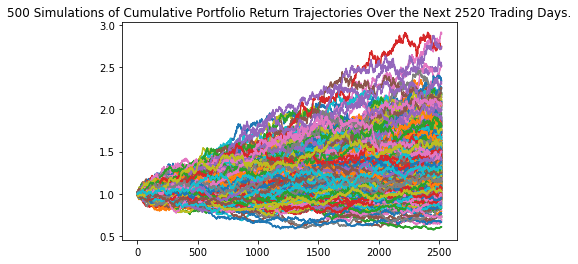

In [61]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
line_plot = MC_10year.plot_simulation()

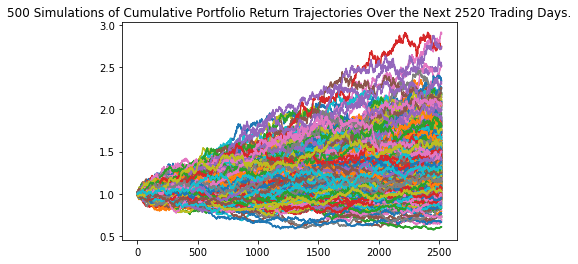

In [62]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()
line_plot.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

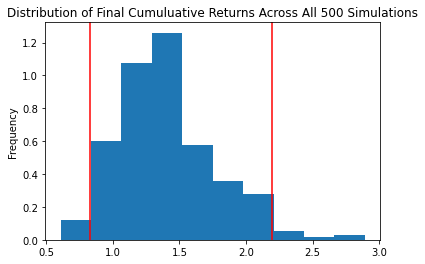

In [63]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10year.plot_distribution()
dist_plot.get_figure().savefig('MC_5year_dist_plot.png',bbox_inches='tight')

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10year.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              1.404341
std               0.361262
min               0.607681
25%               1.148225
50%               1.368747
75%               1.587858
max               2.892654
95% CI Lower      0.828546
95% CI Upper      2.191651
Name: 2520, dtype: float64


In [66]:
# Set initial investment
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $49712.75 and $131499.06
